In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # Correct import for RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV

In [ ]:


# Load the data files
train_df = pd.read_csv(r"D:\UTS ASSIGNMENTS\Semester 3\AMLA\uts-36120-2024-spr\train.csv", low_memory=False)
test_df = pd.read_csv(r"D:\UTS ASSIGNMENTS\Semester 3\AMLA\uts-36120-2024-spr\test.csv", low_memory=False)
sample_submission_df = pd.read_csv(r"D:\UTS ASSIGNMENTS\Semester 3\AMLA\uts-36120-2024-spr\sample_submission.csv")


In [ ]:
# Define a data cleaning function
def data_cleaning(nba_df):
    # Separate numeric and non-numeric columns
    numeric_cols = nba_df.select_dtypes(include=['number']).columns
    object_cols = nba_df.select_dtypes(include=['object']).columns

    # Fill missing values for numeric columns using median
    nba_df[numeric_cols] = nba_df[numeric_cols].fillna(nba_df[numeric_cols].median())

    # Convert categorical columns to numeric codes
    for col in object_cols:
        nba_df[col] = nba_df[col].astype('category').cat.codes

    return nba_df

# Clean the train and test datasets
train_df_cleaned = data_cleaning(train_df)
test_df_cleaned = data_cleaning(test_df)


In [ ]:
# Define features (X) and target (y)
X = train_df_cleaned.drop(columns=['drafted'])
y = train_df_cleaned['drafted'].astype(int)

# Prepare test features
X_test = test_df_cleaned


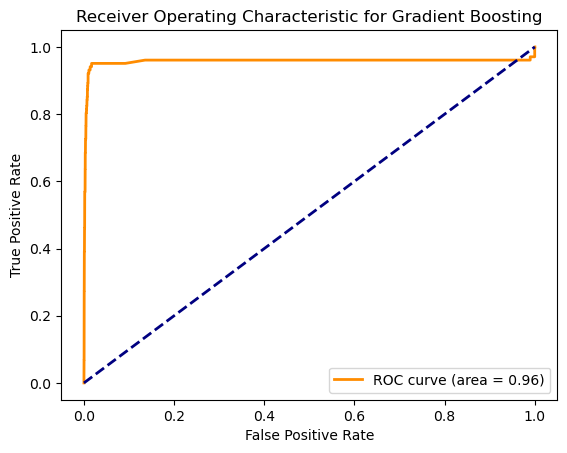

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Fit the model
gbm_model.fit(X_train, y_train)

# Predict probabilities on the validation set
val_probs_gbm = gbm_model.predict_proba(X_val)[:, 1]

# Evaluate using ROC curve
fpr_gbm, tpr_gbm, _ = roc_curve(y_val, val_probs_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gbm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Predict probabilities on the test set
probs_test_gbm = gbm_model.predict_proba(X_test)[:, 1]  # Use the trained Gradient Boosting model


In [ ]:
# Copy the sample submission template
submission_df = sample_submission_df.copy()

# Replace the 'drafted' column with the predicted probabilities
submission_df['drafted'] = probs_test_gbm


In [ ]:
# Save the submission file
submission_df.to_csv(r"D:\UTS ASSIGNMENTS\Semester 3\AMLA\uts-36120-2024-spr\gbm_submission.csv", index=False)

print("Submission file 'gbm_submission.csv' created successfully!")


Submission file 'gbm_submission.csv' created successfully!


In [ ]:
# Initialize Randomized Search with Gradient Boosting
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.05}
Best ROC AUC Score: 0.9959908447507129


In [ ]:
# Predict probabilities on the test set using the best model
probs_test_best_gbm = best_gbm.predict_proba(X_test)[:, 1]

# Prepare the submission DataFrame
submission_df = sample_submission_df.copy()
submission_df['drafted'] = probs_test_best_gbm

# Save the submission file
submission_df.to_csv(r"D:\UTS ASSIGNMENTS\Semester 3\AMLA\uts-36120-2024-spr\gbm_submission_tuned.csv", index=False)

print("Submission file 'gbm_submission_tuned.csv' created successfully!")


Submission file 'gbm_submission_tuned.csv' created successfully!
